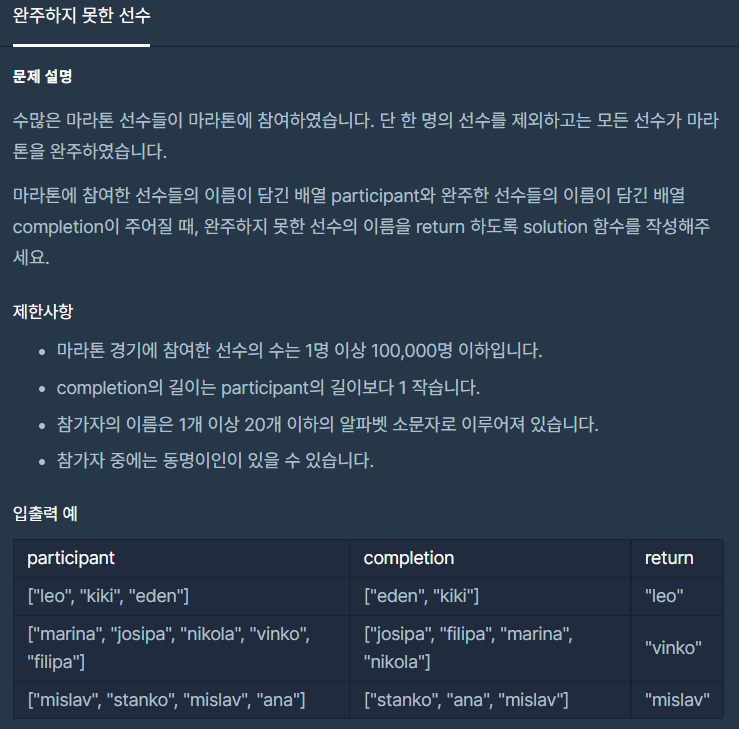

참가자의 앞글자를 숫자로 바꾸어 key값으로, value로 이름으로 한 dictionary를 만든다.

In [1]:
participant = ["leo", "kiki", "eden"]

def parti_dict(participants):
    
    parti_dict = dict()
    for participant in participants:
        parti_dict[ord(participant[0])]=participant
    
    return parti_dict

parti_dict(participant)

{108: 'leo', 107: 'kiki', 101: 'eden'}

완주자의 앞글자를 숫자로 바꾸어 key값으로, value로 이름으로 한 dictionary를 만든다.

In [2]:
completion = ["eden", "kiki"]

def compl_dict(completions):
    
    compl_dict = dict()
    for completion in completions:
        compl_dict[ord(completion[0])]=completion
    
    return compl_dict

compl_dict(completion)

{101: 'eden', 107: 'kiki'}

앞서 만든 두 함수로 만든 dictionary의 키 값을 비교하여 다를 시 그에 대한 value 값을 반환

In [3]:
def solution(participant, completion):
    
    parti = parti_dict(participant)
    compl = compl_dict(completion)
    
    for i in parti:
        if i not in compl:
            answer = answer + parti[i]
            return answer

동명이인 경우에 오류가 발생  
인덱스를 하나하나 따로 만들어 고유의 값을 생성

In [4]:
participant = ["josipa", "josipa", "marina", "marina"]
completion = ["josipa", "josipa", "marina"]
def parti_dict(participants):
    
    parti_dict = dict()
    for index, participant in enumerate(participants):
        parti_dict[index]=participant
    
    return parti_dict

def compl_dict(completions):
    
    compl_dict = dict()
    for index, completion in enumerate(completions):
        compl_dict[index]=completion
    
    return compl_dict

# print(parti_dict(participant))
# compl_dict(completion)

In [5]:
def solution(participant, completion):
    
    answer=''
    parti = parti_dict(participant)
    compl = compl_dict(completion)

    for i in parti:
        if i not in compl:
            answer = answer + parti[i]
            return answer
        
solution(participant, completion)

'marina'

In [6]:
participant = [["leo", "kiki", "eden"],
               ["marina", "josipa", "nikola", "vinko", "filipa"],
               ["mislav", "stanko", "mislav", "ana"],
               ["leo", "leo", "leo"],
               ["marina","josipa","marina","josipa","josipa","ana","marina","marina"]]

completion = [["eden", "kiki"],
              ["josipa", "filipa", "marina", "nikola"],
              ["stanko", "ana", "mislav"],
              ["leo","leo"],
              ["marina","josipa","marina","josipa","josipa","marina","marina"]] # ana가 나와야 함

for i, z in zip(participant, completion):
    print(solution(i, z))

eden
filipa
ana
leo
marina


맨 마지막 사람만 나오는 것을 확인  
dictionary를 생성할 시 sorted를 만들기로 함

In [7]:
def parti_dict(participants):
    
    participants = sorted(participants)
    parti_dict = dict()
    for index, participant in enumerate(participants):
        parti_dict[index]=participant
    
    return parti_dict

def compl_dict(completions):
    
    completions = sorted(completions)
    compl_dict = dict()
    for index, completion in enumerate(completions):
        compl_dict[index]=completion
    
    return compl_dict

In [8]:
def solution(participant, completion):
    
    answer=''
    parti = parti_dict(participant)
    compl = compl_dict(completion)

    for i in parti:
        if i not in compl:
            answer = answer + parti[i]
            return answer

# 평가 함수 생성

In [9]:
participant = [["leo", "kiki", "eden"],
               ["marina", "josipa", "nikola", "vinko", "filipa"],
               ["mislav", "stanko", "mislav", "ana"],
               ["leo", "leo", "leo"],
               ["marina","josipa","marina","josipa","josipa","ana","marina","marina"]]

completion = [["eden", "kiki"],
              ["josipa", "filipa", "marina", "nikola"],
              ["stanko", "ana", "mislav"],
              ["leo","leo"],
              ["marina","josipa","marina","josipa","josipa","marina","marina"]] 
# leo, vinko, mislav, leo, ana가 나와야 함

answer = ["leo", "vinko", "mislav", "leo", "ana"]
cnt=0

for i, z in zip(participant, completion):
    if solution(i, z) == answer[cnt]:
        print('정답')
        cnt += 1
    else:
        print(solution(i,z), answer[cnt])
        cnt += 1

정답
정답
stanko mislav
정답
marina ana


함수를 간략하게 바꿈

In [10]:
def make_dict(participants, completions):
    
    participants = sorted(participants)
    completions = sorted(completions)
    compl_dict, parti_dict = dict(), dict()
    
    for index, participant in enumerate(participants):
        parti_dict[index]=participant
    
    for index, completion in enumerate(completions):
        compl_dict[index]=completion
    
    return parti_dict,compl_dict

In [11]:
def solution(participant, completion):
    
    answer=''
    parti = parti_dict(participant)
    compl = compl_dict(completion)

    for i in parti:
        if i not in compl:
            answer = answer + parti[i]
            return answer

In [12]:
participant = [["leo", "kiki", "eden"],
               ["marina", "josipa", "nikola", "vinko", "filipa"],
               ["mislav", "stanko", "mislav", "ana"],
               ["leo", "leo", "leo"],
               ["marina","josipa","marina","josipa","josipa","ana","marina","marina"]]

completion = [["eden", "kiki"],
              ["josipa", "filipa", "marina", "nikola"],
              ["stanko", "ana", "mislav"],
              ["leo","leo"],
              ["marina","josipa","marina","josipa","josipa","marina","marina"]] 
# leo, vinko, mislav, leo, ana가 나와야 함

answer = ["leo", "vinko", "mislav", "leo", "ana"]
cnt=0

for i, z in zip(participant, completion):
    if solution(i, z) == answer[cnt]:
        print('정답')
        cnt += 1
    else:
        print(solution(i,z), answer[cnt])
        cnt += 1

정답
정답
stanko mislav
정답
marina ana


동명이인에 대한 오류 수정 2:  
앞글자를 ord로 고유 번호를 지정하고  
만약 동명이인일 경우 ord에 +1하여 구분

In [13]:
participants = ["marina","josipa","marina","josipa","josipa","ana","marina","marina"]
completions = ["marina","josipa","marina","josipa","josipa","marina","marina"]

compl_dict, parti_dict = dict(), dict()
cnt = 0
for participant in participants:
    if ord(participant[0]) in parti_dict:
        parti_dict[ord(participant[0])+cnt]=participant
        cnt += 1
    parti_dict[ord(participant[0])]=participant
    cnt += 1
    
cnt=0
for completion in completions:
    if ord(completion[0]) in compl_dict:
        compl_dict[ord(completion[0])+cnt]=completion
        cnt += 1
    compl_dict[ord(completion[0])]=completion
    cnt += 1
    

print(compl_dict)
print(parti_dict)

{109: 'marina', 106: 'josipa', 111: 'marina', 110: 'josipa', 112: 'josipa', 117: 'marina', 119: 'marina'}
{109: 'marina', 106: 'josipa', 111: 'marina', 110: 'josipa', 112: 'josipa', 97: 'ana', 118: 'marina', 120: 'marina'}


In [14]:
def make_dict(participants, completions):
    
    compl_dict, parti_dict = dict(), dict()
    cnt = 0
    for participant in participants:
        if ord(participant[0]) in parti_dict:
            parti_dict[ord(participant[0])+cnt]=participant
            cnt += 1
        parti_dict[ord(participant[0])]=participant
        cnt += 1

    cnt=0
    for completion in completions:
        if ord(completion[0]) in compl_dict:
            compl_dict[ord(completion[0])+cnt]=completion
            cnt += 1
        compl_dict[ord(completion[0])]=completion
        cnt += 1
    
    return parti_dict,compl_dict

In [15]:
def solution(participant, completion):
    
    answer=''
    parti_dict, compl_dict = make_dict(participant, completion)

    for i in parti_dict:
        if i not in compl_dict:
            answer = answer + parti_dict[i]
            return answer

In [16]:
participant = [["leo", "kiki", "eden"],
               ["marina", "josipa", "nikola", "vinko", "filipa"],
               ["mislav", "stanko", "mislav", "ana"],
               ["leo", "leo", "leo"]]

completion = [["eden", "kiki"],
              ["josipa", "filipa", "marina", "nikola"],
              ["stanko", "ana", "mislav"],
              ["leo","leo"]] 
# leo, vinko, mislav, leo, ana가 나와야 함

answer = ["leo", "vinko", "mislav", "leo", "ana"]
cnt=0

for i, z in zip(participant, completion):
    if solution(i, z) == answer[cnt]:
        print('정답')
        cnt += 1
    else:
        print(solution(i,z), answer[cnt])
        cnt += 1

정답
정답
정답
정답


In [17]:
def solution(participants, completions):
    
    participants = sorted(participants)
    completions = sorted(completions)
    
    part_dict = dict()
    comp_dict = dict()
    
    cnt_p = 0

    for participant, completion in zip(participants,completions):
        
        part_dict[hash(participant)] = participant
        comp_dict[hash(completion)] = completion
        
        cnt_p += hash(participant)
        cnt_p -= hash(completion)
        print(part_dict)

    return hash(cnt_p)

In [18]:
participant = [["leo", "kiki", "eden"],
               ["marina", "josipa", "nikola", "vinko", "filipa"],
               ["mislav", "stanko", "mislav", "ana"],
               ["leo", "leo", "leo"],
               ["marina","josipa","marina","josipa","josipa","ana","marina","marina"]]

completion = [["eden", "kiki"],
              ["josipa", "filipa", "marina", "nikola"],
              ["stanko", "ana", "mislav"],
              ["leo","leo"],
              ["marina","josipa","marina","josipa","josipa","marina","marina"]] 
# leo, vinko, mislav, leo, ana가 나와야 함

answer = ["leo", "vinko", "mislav", "leo", "ana"]
cnt=0

for i, z in zip(participant, completion):
    if solution(i, z) == answer[cnt]:
        print('정답')
        cnt += 1
    else:
        print(solution(i,z), answer[cnt])
        cnt += 1

{-5451422633862391348: 'eden'}
{-5451422633862391348: 'eden', -6513644183197535096: 'kiki'}
{-5451422633862391348: 'eden'}
{-5451422633862391348: 'eden', -6513644183197535096: 'kiki'}
0 leo
{-2353488399783118607: 'filipa'}
{-2353488399783118607: 'filipa', 4533324448166724712: 'josipa'}
{-2353488399783118607: 'filipa', 4533324448166724712: 'josipa', -780409120638453572: 'marina'}
{-2353488399783118607: 'filipa', 4533324448166724712: 'josipa', -780409120638453572: 'marina', 1829961995286856707: 'nikola'}
{-2353488399783118607: 'filipa'}
{-2353488399783118607: 'filipa', 4533324448166724712: 'josipa'}
{-2353488399783118607: 'filipa', 4533324448166724712: 'josipa', -780409120638453572: 'marina'}
{-2353488399783118607: 'filipa', 4533324448166724712: 'josipa', -780409120638453572: 'marina', 1829961995286856707: 'nikola'}
0 vinko
{1591352995479839627: 'ana'}
{1591352995479839627: 'ana', -5734622591864245417: 'mislav'}
{1591352995479839627: 'ana', -5734622591864245417: 'mislav'}
{15913529954798

하지만 프로그래머스의 효율성 테스트에서 낙제점을 받았다.

# hash 함수를 이용한 풀이
hash( )함수에 한 인자값을 넣으면 무작위의 값을 부여하며  
temp에 participant를 더한 후  
completion 들어온 값을 hash 에 넣어 뺀다.

In [19]:
hash('a')

1153502830003447881

In [20]:
def solution(participant, completion): 
    answer = '' 
    temp = 0 
    dic = {} 
    
    for part in participant: 
        dic[hash(part)] = part 
        temp += hash(part)

    for com in completion: 
        temp -= hash(com) 
    answer = dic[temp] 
            
    return answer

In [21]:
participant = [["leo", "kiki", "eden"],
               ["marina", "josipa", "nikola", "vinko", "filipa"],
               ["mislav", "stanko", "mislav", "ana"],
               ["leo", "leo", "leo"],
               ["marina","josipa","marina","josipa","josipa","ana","marina","marina"]]

completion = [["eden", "kiki"],
              ["josipa", "filipa", "marina", "nikola"],
              ["stanko", "ana", "mislav"],
              ["leo","leo"],
              ["marina","josipa","marina","josipa","josipa","marina","marina"]] 
# leo, vinko, mislav, leo, ana가 나와야 함

answer = ["leo", "vinko", "mislav", "leo", "ana"]
cnt=0

for i, z in zip(participant, completion):
    if solution(i, z) == answer[cnt]:
        print('정답')
        cnt += 1
    else:
        print(solution(i,z), answer[cnt])
        cnt += 1

정답
정답
정답
정답
정답
